In [1]:
!pip install statsmodels --upgrade

     ---------------------------------------- 9.2/9.2 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_rows', None) 

In [21]:
from statsmodels.tsa.ar_model import AutoReg

In [18]:
df = pd.read_csv('C:/Users/jiax2/Teams/Playground/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [40]:
iphone12_df = df[df['phone_generation'] == 'iphone 12']
iphone12_df = iphone12_df.groupby(['weeks_monday'])['claim'].sum().reset_index()
iphone12_df = iphone12_df.sort_values(by='weeks_monday')
iphone12_df.set_index('weeks_monday', inplace=True)
iphone12_df

,claim
weeks_monday,
2021-06-28,422
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
2021-08-02,1212
2021-08-09,1363
2021-08-16,1362
2021-08-23,1394


In [41]:
## first and last week abnormally low so drop
iphone12_df = iphone12_df.drop(iphone12_df.index[-1])
iphone12_df = iphone12_df.drop(iphone12_df.index[0])
iphone12_df 

,claim
weeks_monday,
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
2021-08-02,1212
2021-08-09,1363
2021-08-16,1362
2021-08-23,1394
2021-08-30,1383


In [42]:
iphone12_df.shape

(84, 1)

In [43]:
X = iphone12_df.values # get just the values of the claims 

<AxesSubplot:xlabel='weeks_monday'>

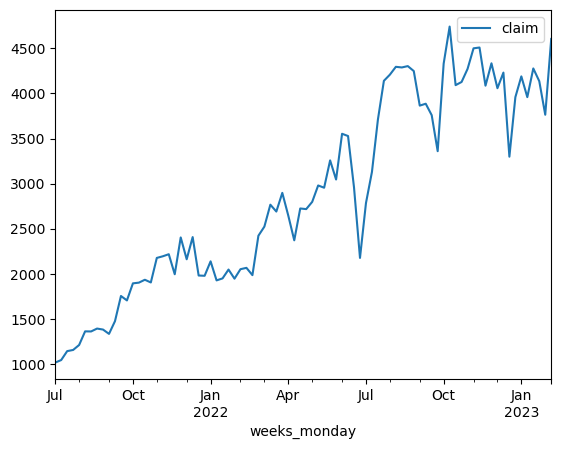

In [44]:
iphone12_df.plot()

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
dftest = adfuller(iphone12_df['claim'], autolag = 'AIC')
print("P-value: ", dftest[1])

P-value:  0.6295073977204196


### Uh oh this means this time series is non-stationary (makes sense, looking at graph see that it's increasing)
### (p value has to be <0.5 to be considered stationary

In [47]:
# do differencing so each value subtracted by previous value to make this time series stationary 
dftest = adfuller(iphone12_df['claim'].diff()[1:], autolag = 'AIC')
print("P-value: ", dftest[1])

P-value:  9.022793461625632e-19


In [48]:
iphone12_df['claim_diff'] = iphone12_df['claim'].diff()

# Remove the first row (which contains a NaN value due to differencing)
iphone12_df = iphone12_df.dropna()

# Print the first few rows of the differenced time series
print(iphone12_df.head())

# Check if the differenced time series is stationary using the Augmented Dickey-Fuller test
dftest = adfuller(iphone12_df['claim_diff'], autolag='AIC')
print('ADF p-value:', dftest[1])

              claim  claim_diff
weeks_monday                   
2021-07-12     1045        28.0
2021-07-19     1144        99.0
2021-07-26     1157        13.0
2021-08-02     1212        55.0
2021-08-09     1363       151.0
ADF p-value: 9.022793461625632e-19


In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

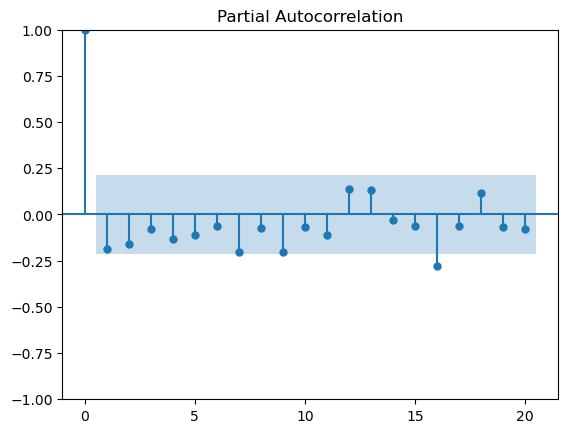

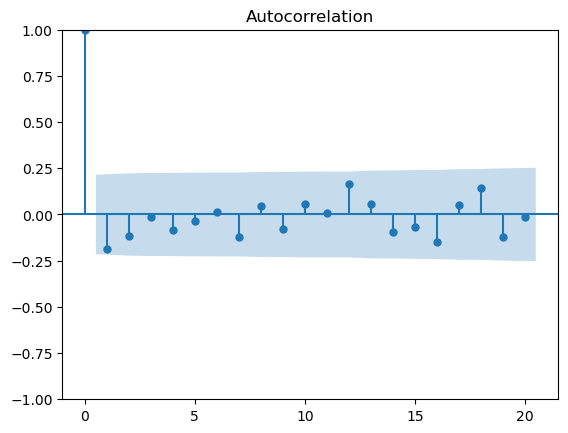

In [52]:
pacf = plot_pacf(iphone12_df['claim_diff'], lags = 20)
acf = plot_acf(iphone12_df['claim_diff'], lags = 20)

In [54]:
X = iphone12_df['claim_diff'].values
train = X[:len(X) - 12]
test = X[len(X) - 12:]

In [67]:
model = AutoReg(train, lags = 10).fit()

In [68]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   71
Model:                    AutoReg(10)   Log Likelihood                -427.662
Method:               Conditional MLE   S.D. of innovations            268.250
Date:                Sat, 11 Mar 2023   AIC                            879.325
Time:                        15:58:44   BIC                            904.655
Sample:                            10   HQIC                           889.252
                                   71                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.8823     49.774      3.353      0.001      69.326     264.438
y.L1          -0.2129      0.128     -1.665      0.096      -0.464       0.038
y.L2          -0.3332      0.125     -2.658      0.0

In [69]:
pred = model.predict(start=len(train), end=len(X) - 1, dynamic = False)

[  46.70706309   68.24289374 -254.87190434  -10.07517973  353.22445291
   57.8166848   -13.40365226   24.45696127   66.13807799   48.37954155
   54.65644852  116.10983298]


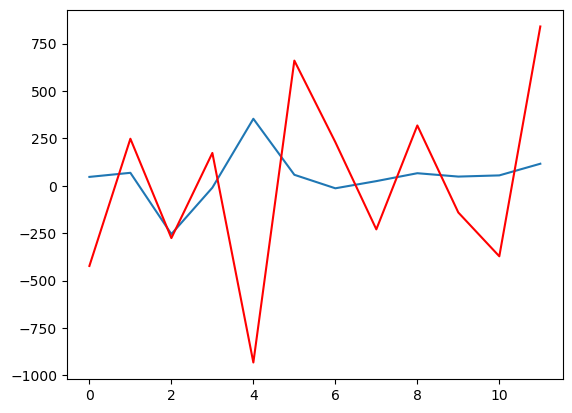

In [70]:
plt.plot(pred)
plt.plot(test, color = 'red')
print(pred)

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

518.8667394969581
